# Ligand clustering process

## Setup

Add user's current working directory to search path:

In [1]:
import sys
sys.path = [r"C:\sw\plb"] + sys.path

Also change current working directory:

In [2]:
import os
os.chdir(r"C:\sw\plb")

Imports:

In [3]:
from collections import Counter
from pathlib import Path

import myst_nb

from src.config import get_config
from src.data_split.ligand_clustering_new import read_ligand_cluster_labels
from src.data_structure_utils import read_tsv
from src.stats_utils import (
    get_stats_from_counter,
    print_counter_stats_df,
)

Set up document options:

In [4]:
# This import automatically sets seeds
import src.set_seed

# Nice pandas tables
import itables
itables.init_notebook_mode(all_interactive=True)
itables.options.maxColumns = 0  # unlimited columns
itables.options.maxBytes = 32000000
itables.options.classes = ["display", "nowrap"]
itables.options.order = [] # disable auto-sorting

<IPython.core.display.Javascript object>

Get filepaths of data directories:

In [5]:
config = get_config()
dir_data = Path(config["data_directory"])
dir_features = Path(config["features_directory"])

## Overview

The general process I used for clustering the ligand SMILES is:

- Get a combined list of all unique ligand SMILES present in the filtered BindingDB and BioLiP dataframes
- Clustered using [sphere exclusion clustering](https://rdkit.blogspot.com/2020/11/sphere-exclusion-clustering-with-rdkit.html)
 with the following parameters:
  - Ligand embedding was performed with ECFP4 fingerprints (i.e. Morgan fingerprint bit vectors with radius = 2)
  - The distance metric was Jaccard distance
  - The minimum distance between cluster centroids was 0.65


## Cluster statistics

Read the ligand cluster assignments file:

In [6]:
df_ligand_clusters = read_ligand_cluster_labels(
    ligand_clusters_tsv=dir_features / "all_ligand_cluster_info.tsv",
    all_smiles_txt=dir_features / "all_ligand_smiles_single.txt",
)

Print a sample of the clustering outputs:

In [7]:
itables.show(df_ligand_clusters.head(30))

Loading... (need help?)


Generate some statistics from the clustering outputs:

Total number of entries: 67025
Total number of unique entries: 7053
Distribution of frequencies of individual entries, linear scale (left):
Distribution of frequencies of individual entries, log scale (right):


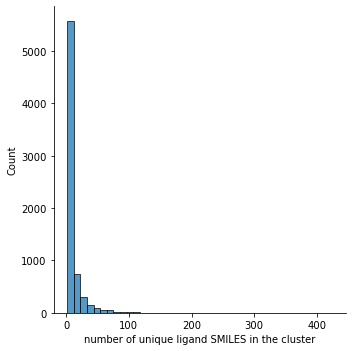

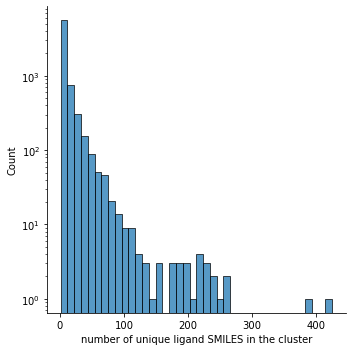

In [8]:
ligand_cluster_stats = get_stats_from_counter(
    Counter(df_ligand_clusters["closest_centroid_index"]),
    ntop=30,
    nbins=40,
    name_of_thing_being_counted="cluster_label",
    xaxis_name="number of unique ligand SMILES in the cluster",
    do_show=True,
)

The most commonly occurring clusters are:

In [9]:
print_counter_stats_df(ligand_cluster_stats)

Loading... (need help?)
